In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [78]:
df = pd.read_csv('train.csv')

In [79]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [80]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [81]:
df.TWF.unique()

array([0, 1], dtype=int64)

In [82]:
df.shape

(136429, 14)

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,136429.0,68214.000000,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0


In [84]:
df.loc[:,"RNF"].value_counts()

RNF
0    136121
1       308
Name: count, dtype: int64

In [85]:
df[df.loc[:,"Machine failure"]==1][['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)

,TWF,HDF,PWF,OSF,RNF
0,1936,1450,1824,1612,2142
1,212,698,324,536,6


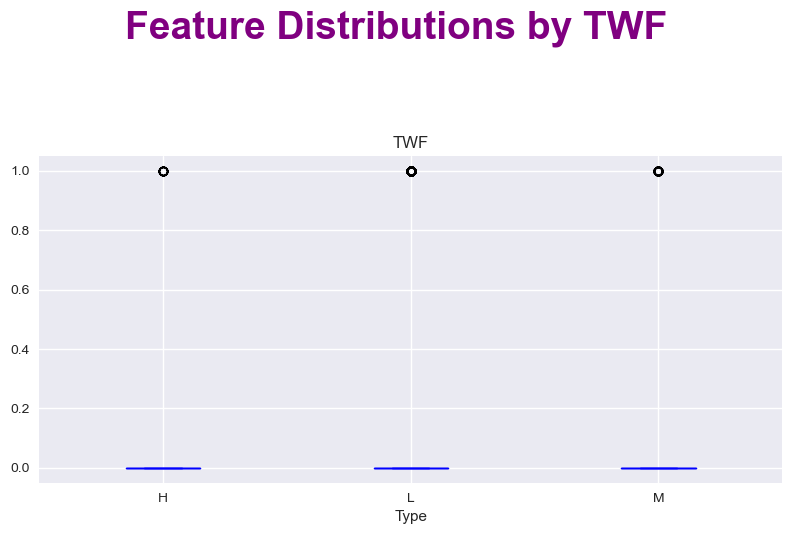

In [86]:
fig, ax = plt.subplots()
df.boxplot(column='TWF', by='Type', color='blue', ax=ax)

fig.suptitle(f'Feature Distributions by TWF\n\n', ha='center', fontweight='bold', color='purple', fontsize=28, y=0.96)
plt.tight_layout(pad=1.0)
plt.show()

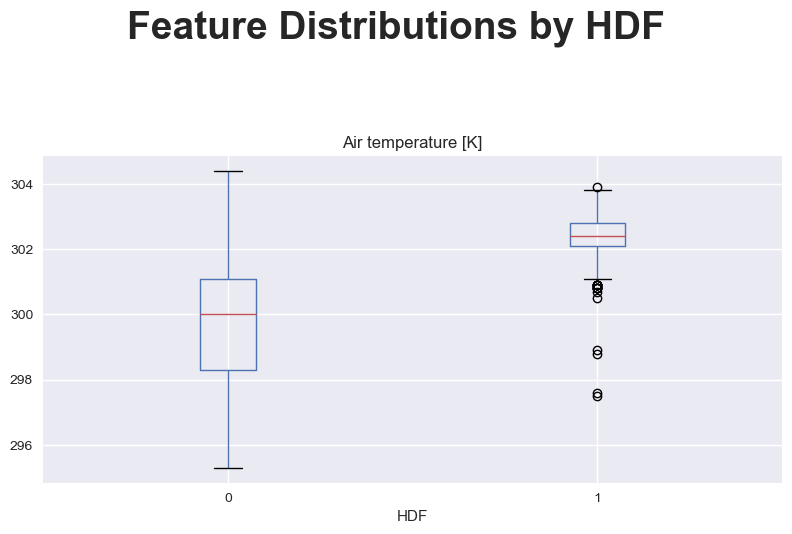

In [66]:
fig, ax = plt.subplots()
df.boxplot(column='Air temperature [K]', by='HDF', ax=ax)

fig.suptitle(f'Feature Distributions by HDF\n\n', ha='center', fontweight='bold', fontsize=28, y=0.96)
plt.tight_layout(pad=1.0)
plt.show()

NameError: name 'c' is not defined

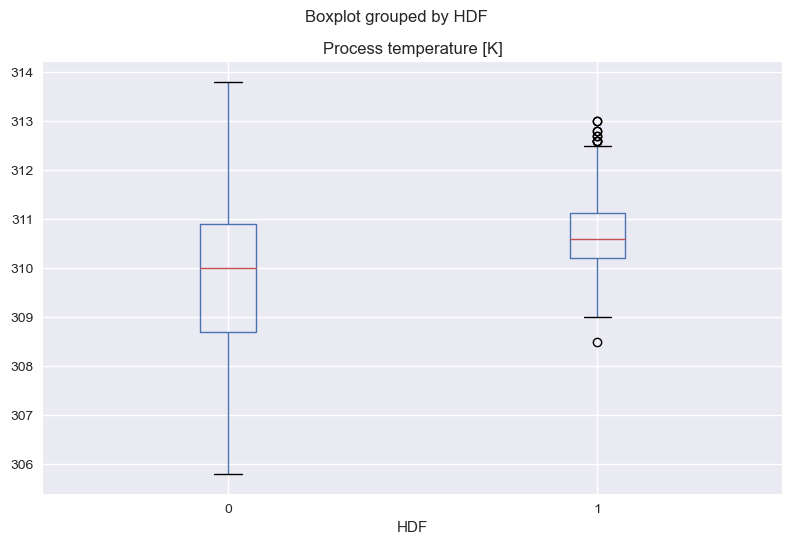

In [87]:
fig, ax = plt.subplots()
df.boxplot(column='Process temperature [K]', by='HDF', ax=ax)

plt.tight_layout(pad=1.0)
plt.show()

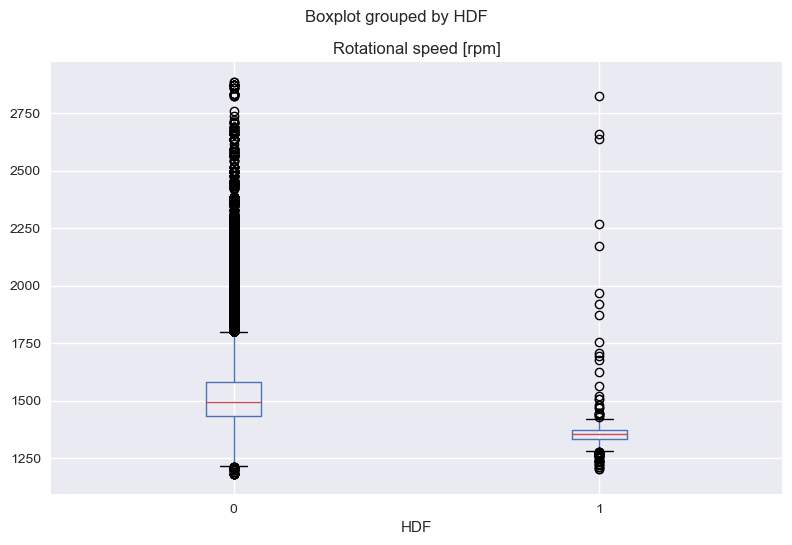

In [88]:
fig, ax = plt.subplots()
df.boxplot(column='Rotational speed [rpm]', by='HDF', ax=ax)

plt.tight_layout(pad=1.0)
plt.show()

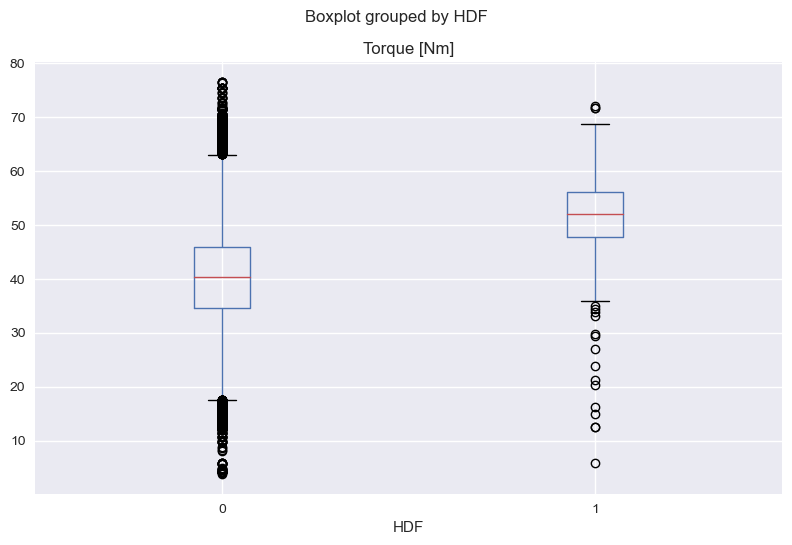

In [70]:
fig, ax = plt.subplots()
df.boxplot(column='Torque [Nm]', by='HDF', ax=ax) 

plt.tight_layout(pad=1.0)
plt.show()

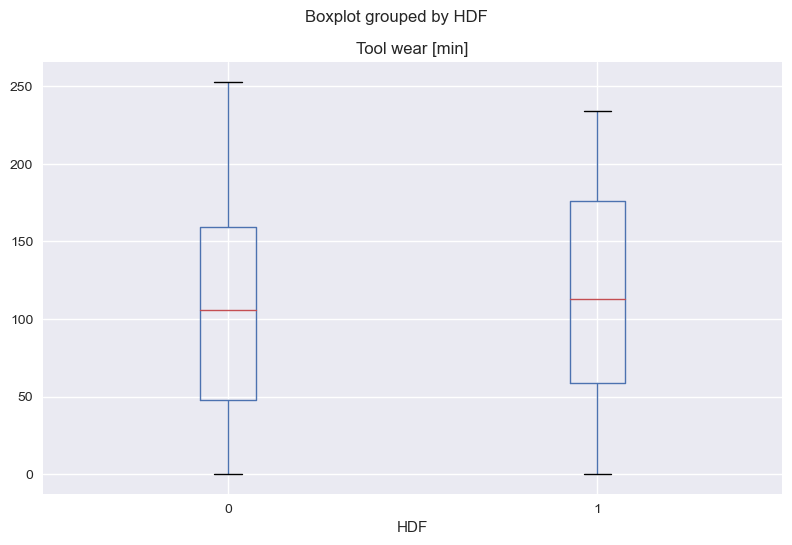

In [89]:
fig, ax = plt.subplots()
df.boxplot(column='Tool wear [min]', by='HDF', ax=ax)

plt.tight_layout(pad=1.0)
plt.show()

<Axes: ylabel='Frequency'>

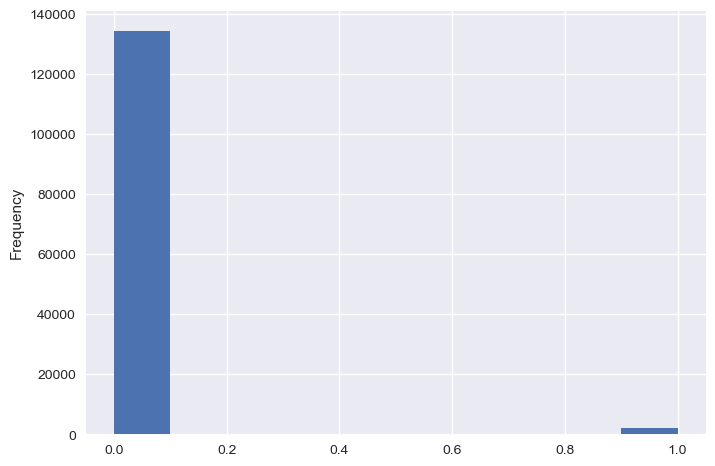

In [90]:
df.loc[:, 'Machine failure'].plot(kind='hist')

<Axes: ylabel='Frequency'>

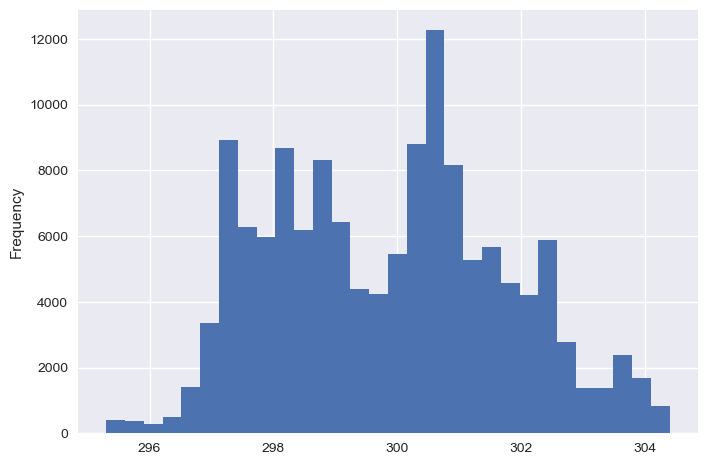

In [98]:
df.loc[:, 'Air temperature [K]'].plot(kind='hist', bins=30)

Machine failure
0    Axes(0.01,0.01;0.98x0.98)
1    Axes(0.01,0.01;0.98x0.98)
Name: Air temperature [K], dtype: object

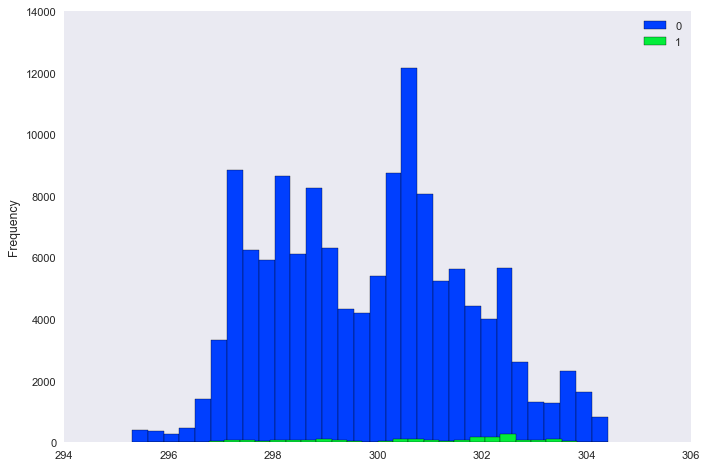

In [154]:

plt.style.use('seaborn-v0_8-bright')

df.groupby('Machine failure')['Air temperature [K]'].plot(kind='hist', bins=30, grid=False,
                                             legend=True)



Machine failure
0    Axes(0.01,0.01;0.98x0.98)
1    Axes(0.01,0.01;0.98x0.98)
Name: Tool wear [min], dtype: object

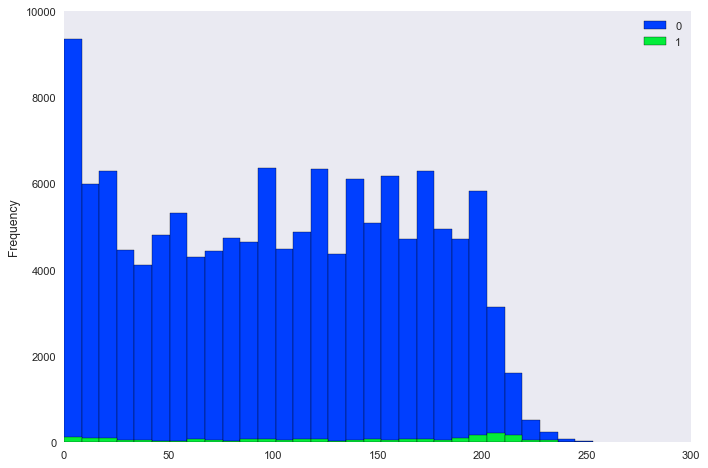

In [155]:
plt.style.use('seaborn-v0_8-bright')

df.groupby('Machine failure')['Tool wear [min]'].plot(kind='hist', bins=30, grid=False,
                                             legend=True)


In [156]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Machine failure
0    Axes(0.01,0.01;0.98x0.98)
1    Axes(0.01,0.01;0.98x0.98)
Name: Torque [Nm], dtype: object

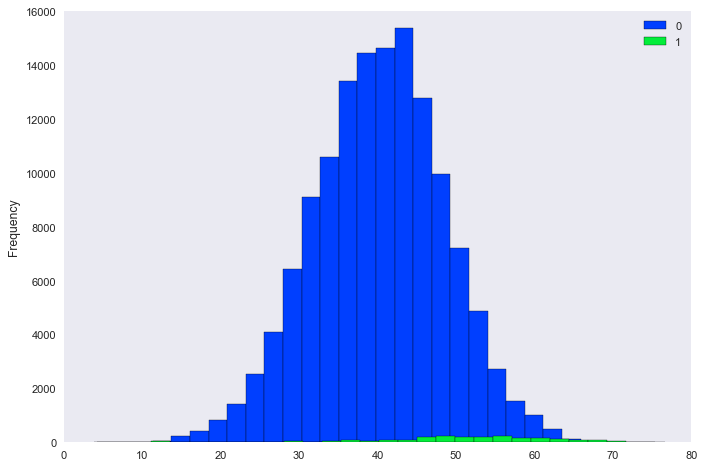

In [157]:
plt.style.use('seaborn-v0_8-bright')

df.groupby('Machine failure')['Torque [Nm]'].plot(kind='hist', bins=30, grid=False,
                                             legend=True)


Machine failure
0    Axes(0.01,0.01;0.98x0.98)
1    Axes(0.01,0.01;0.98x0.98)
Name: Rotational speed [rpm], dtype: object

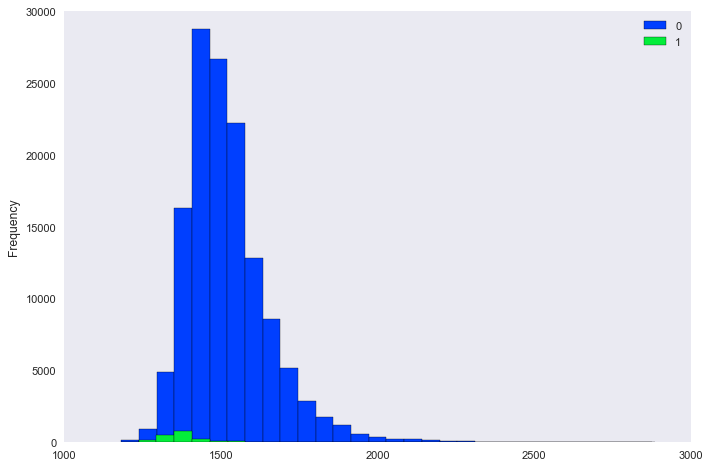

In [159]:
plt.style.use('seaborn-v0_8-bright')

df.groupby('Machine failure')['Rotational speed [rpm]'].plot(kind='hist', bins=30, grid=False,
                                             legend=True)


Machine failure
0    Axes(0.01,0.01;0.98x0.98)
1    Axes(0.01,0.01;0.98x0.98)
Name: Process temperature [K], dtype: object

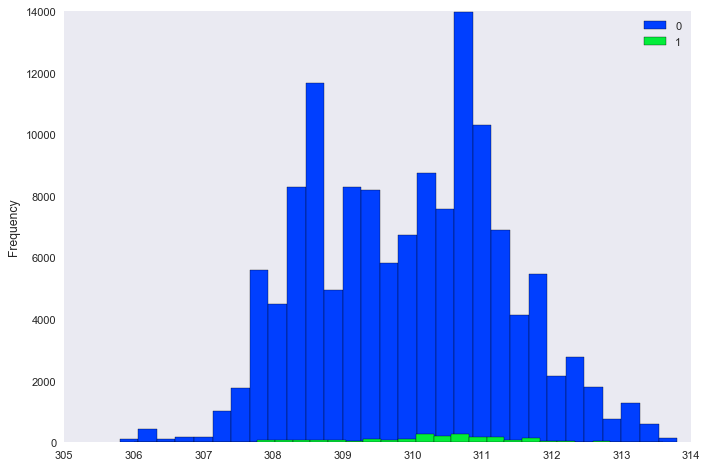

In [160]:
plt.style.use('seaborn-v0_8-bright')

df.groupby('Machine failure')['Process temperature [K]'].plot(kind='hist', bins=30, grid=False,
                                             legend=True)


In [161]:
from matplotlib import colors

df['Product Variant'] = df['Product ID'].astype(str).str[:3]
failure_types = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF']

group_product = df['Product Variant'].value_counts().reset_index()
group_product.columns = ['Product Variant', 'Count']

In [163]:
for fail in failure_types:
    
    # Sum the failures by product variant
    temp = df.groupby('Product Variant')[fail].sum().reset_index()
    group_product = pd.merge(group_product, temp, on='Product Variant')
    
    # Calculate failure ratio
    group_product[fail + '_ratio'] = (group_product[fail] / group_product['Count'])*100

scaler = MinMaxScaler()
heatmap_failure = group_product.set_index('Product Variant')[['TWF_ratio', 'HDF_ratio', 'PWF_ratio', 'OSF_ratio']]

ratio_cols = ['TWF_ratio', 'HDF_ratio', 'PWF_ratio', 'OSF_ratio']
heatmap_scaled = heatmap_failure.copy()
heatmap_scaled[ratio_cols] = scaler.fit_transform(heatmap_failure[ratio_cols])


KeyError: 'Machine failure'